In [1]:
# EN İYİ ÖLÇÜM LSTM



import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime


stock = "CIMSA.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today()
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)





scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

train_predict_plot = np.empty_like(prices_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(prices_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(prices_scaled) - 1, :] = test_predict



y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Eğitim Verileri', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Verileri', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Eğitim ve Test Verileri  ASELSAN')
plt.legend()
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(test_predict, label='Tahminler', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler ve Tahminler  ASELSAN')
plt.legend()
plt.show()



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, test_predict)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-Kare (R2): {r2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): {mape:.2f}%")



In [3]:
stock = "ASELS.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today()
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.tail()

,Date,Close
2297,2024-01-22,47.119999
2298,2024-01-23,47.259998
2299,2024-01-24,48.400002
2300,2024-01-25,48.480000
2301,2024-01-26,49.180000


2024-01-28 15:45:25.947863: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-28 15:45:25.947903: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-28 15:45:25.947927: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-28 15:45:25.947985: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-28 15:45:25.948014: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-01-28 15:45:29.998366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


112/112 - 9s - loss: 3.1422e-04 - 9s/epoch - 81ms/step
Epoch 2/100
112/112 - 3s - loss: 7.0844e-05 - 3s/epoch - 29ms/step
Epoch 3/100
112/112 - 3s - loss: 6.2567e-05 - 3s/epoch - 29ms/step
Epoch 4/100
112/112 - 3s - loss: 6.9578e-05 - 3s/epoch - 28ms/step
Epoch 5/100
112/112 - 3s - loss: 5.8168e-05 - 3s/epoch - 29ms/step
Epoch 6/100
112/112 - 3s - loss: 5.6816e-05 - 3s/epoch - 28ms/step
Epoch 7/100
112/112 - 3s - loss: 4.4968e-05 - 3s/epoch - 28ms/step
Epoch 8/100
112/112 - 3s - loss: 3.6270e-05 - 3s/epoch - 27ms/step
Epoch 9/100
112/112 - 3s - loss: 3.6500e-05 - 3s/epoch - 28ms/step
Epoch 10/100
112/112 - 3s - loss: 3.5429e-05 - 3s/epoch - 28ms/step
Epoch 11/100
112/112 - 3s - loss: 3.4214e-05 - 3s/epoch - 27ms/step
Epoch 12/100
112/112 - 3s - loss: 3.3353e-05 - 3s/epoch - 28ms/step
Epoch 13/100
112/112 - 3s - loss: 3.4335e-05 - 3s/epoch - 30ms/step
Epoch 14/100
112/112 - 3s - loss: 3.5745e-05 - 3s/epoch - 25ms/step
Epoch 15/100
112/112 - 3s - loss: 2.5211e-05 - 3s/epoch - 28ms/step
E

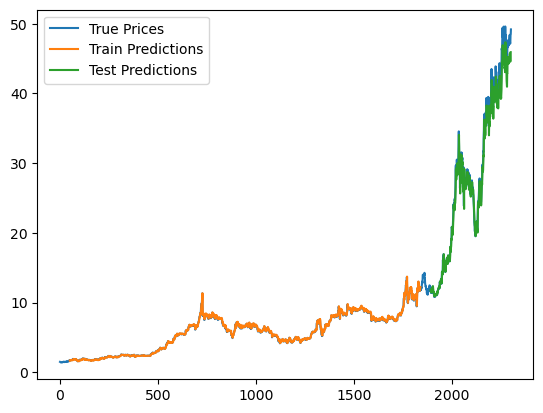

In [6]:

from tensorflow.keras.layers import LSTM, Dense



scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

train_predict_plot = np.empty_like(prices_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(prices_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(prices_scaled) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')

plt.plot(train_predict_plot, label='Train Predictions')

plt.plot(test_predict_plot, label='Test Predictions')

plt.legend()
plt.show()



In [7]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

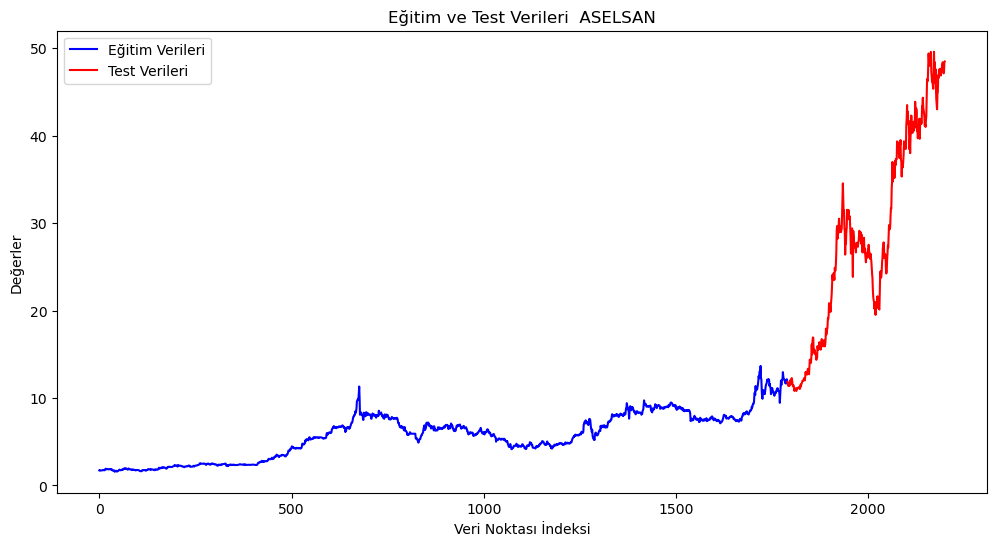

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Eğitim Verileri', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Verileri', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Eğitim ve Test Verileri  ASELSAN')
plt.legend()
plt.show()

In [50]:
y_test = y_test.reshape(-1,1)

In [51]:
y_train = y_train.reshape(-1,1)

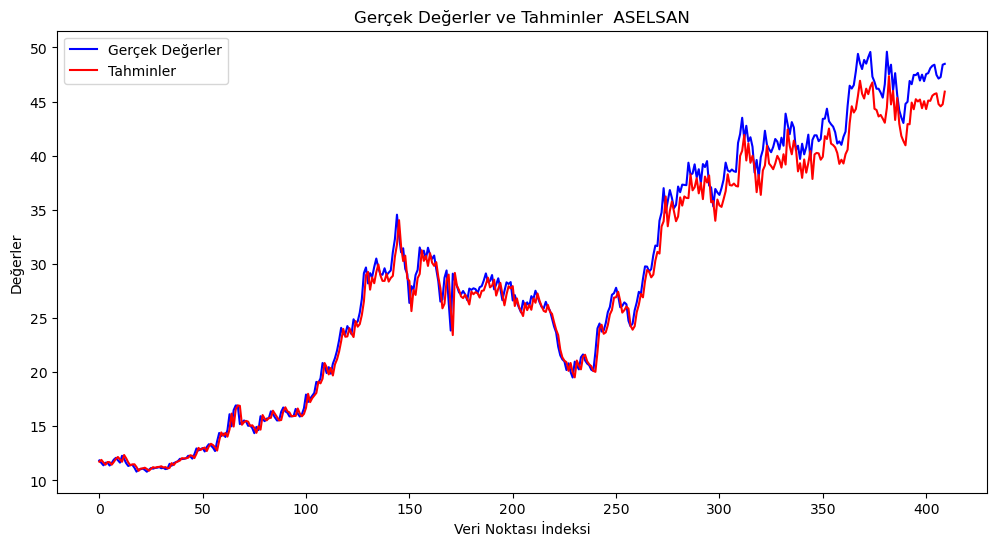

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(test_predict, label='Tahminler', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler ve Tahminler  ASELSAN')
plt.legend()
plt.show()

Ortalama Kare Hata (MSE): 2.31
Kök Ortalama Kare Hata (RMSE): 1.52
Ortalama Mutlak Hata (MAE): 1.08
R-Kare (R2): 0.98
Ortalama Mutlak Yüzde Hata (MAPE): 3.37%


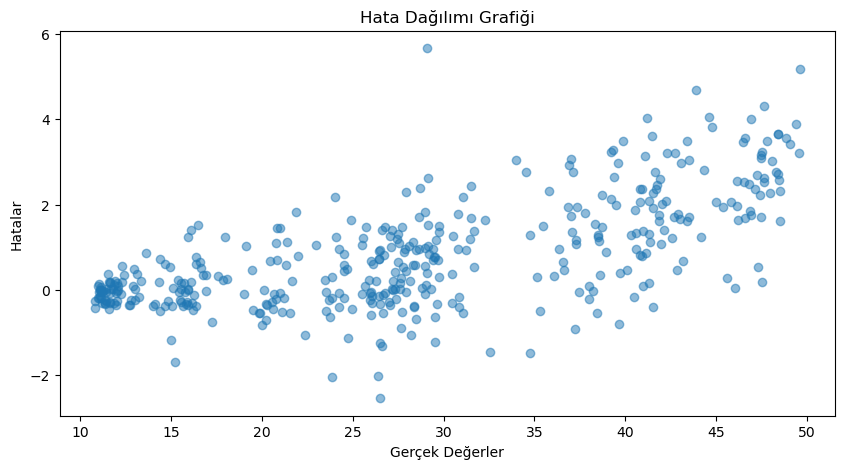

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, test_predict)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-Kare (R2): {r2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): {mape:.2f}%")



1/1 [==============================] - 0s 18ms/step


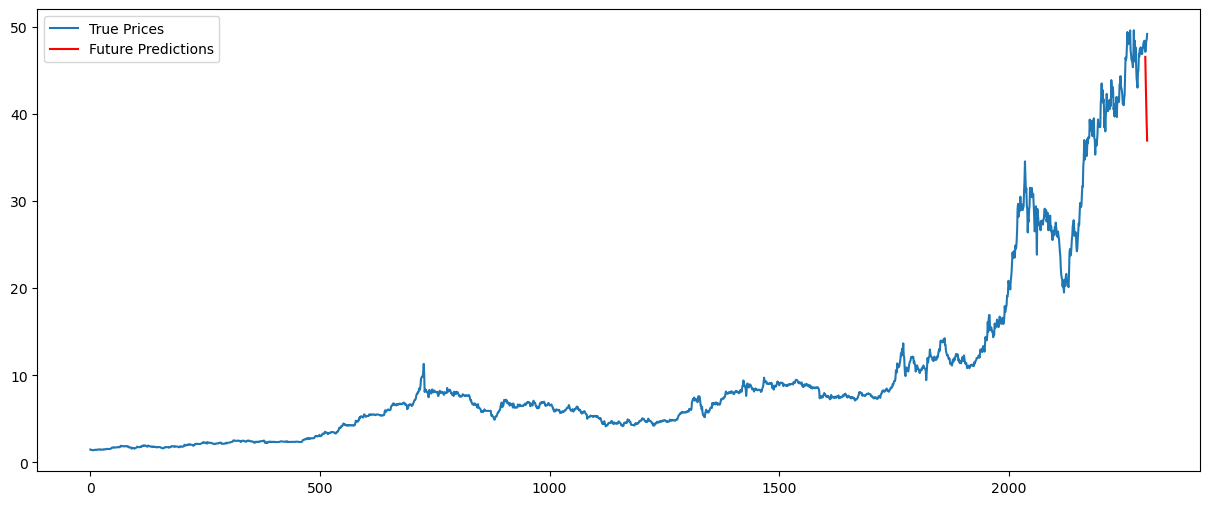

In [15]:
future_days = 5
last_sequence = prices_scaled[-time_steps:]  

future_predictions = []

for i in range(future_days):
    last_sequence = last_sequence.reshape(1, time_steps, 1) 
    next_prediction = model.predict(last_sequence)  
    future_predictions.append(next_prediction[0, 0])  
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1) 

future_predictions_array = np.array(future_predictions)

future_predictions_2d = future_predictions_array.reshape(-1, 1)

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')
plt.plot(range(len(prices_scaled) - future_days, len(prices_scaled)),
         scaler.inverse_transform(future_predictions_2d), label='Future Predictions', color='red')
plt.legend()
plt.show()

In [16]:
scaler.inverse_transform(future_predictions_2d)

array([[46.549805],
       [43.694843],
       [41.14109 ],
       [38.894512],
       [36.94379 ]], dtype=float32)

In [17]:
df.tail()

,Date,Close
2297,2024-01-22,47.119999
2298,2024-01-23,47.259998
2299,2024-01-24,48.400002
2300,2024-01-25,48.480000
2301,2024-01-26,49.180000


THYAO

In [19]:
stock = "THYAO.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today()
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [21]:
df.tail()

,Date,Close
2297,2024-01-22,250.250000
2298,2024-01-23,248.800003
2299,2024-01-24,251.000000
2300,2024-01-25,252.250000
2301,2024-01-26,260.000000


Epoch 1/100
112/112 - 3s - loss: 4.8366e-05 - 3s/epoch - 31ms/step
Epoch 2/100
112/112 - 2s - loss: 1.1151e-05 - 2s/epoch - 16ms/step
Epoch 3/100
112/112 - 2s - loss: 1.0224e-05 - 2s/epoch - 16ms/step
Epoch 4/100
112/112 - 2s - loss: 8.8597e-06 - 2s/epoch - 16ms/step
Epoch 5/100
112/112 - 2s - loss: 9.0112e-06 - 2s/epoch - 16ms/step
Epoch 6/100
112/112 - 2s - loss: 8.8464e-06 - 2s/epoch - 16ms/step
Epoch 7/100
112/112 - 2s - loss: 6.3767e-06 - 2s/epoch - 16ms/step
Epoch 8/100
112/112 - 2s - loss: 6.2887e-06 - 2s/epoch - 16ms/step
Epoch 9/100
112/112 - 2s - loss: 5.9490e-06 - 2s/epoch - 17ms/step
Epoch 10/100
112/112 - 2s - loss: 5.7282e-06 - 2s/epoch - 16ms/step
Epoch 11/100
112/112 - 2s - loss: 5.2599e-06 - 2s/epoch - 16ms/step
Epoch 12/100
112/112 - 2s - loss: 5.7447e-06 - 2s/epoch - 16ms/step
Epoch 13/100
112/112 - 2s - loss: 4.2733e-06 - 2s/epoch - 16ms/step
Epoch 14/100
112/112 - 2s - loss: 3.8466e-06 - 2s/epoch - 17ms/step
Epoch 15/100
112/112 - 2s - loss: 3.9058e-06 - 2s/epoch -

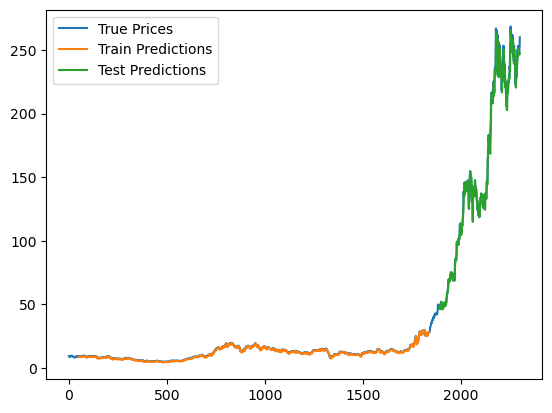

In [22]:


scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

train_predict_plot = np.empty_like(prices_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(prices_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(prices_scaled) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')

plt.plot(train_predict_plot, label='Train Predictions')

plt.plot(test_predict_plot, label='Test Predictions')

plt.legend()
plt.show()

In [4]:
df.head()

,Date,Close
0,2013-04-26,18.750000
1,2013-07-23,28.700001
2,2013-07-24,27.600000
3,2013-07-25,27.600000
4,2013-07-26,27.400000


In [28]:
df.isna().sum()

Date     0
Close    0
dtype: int64

In [23]:
y_test = y_test.reshape(-1,1)

In [24]:
y_train = y_train.reshape(-1,1)

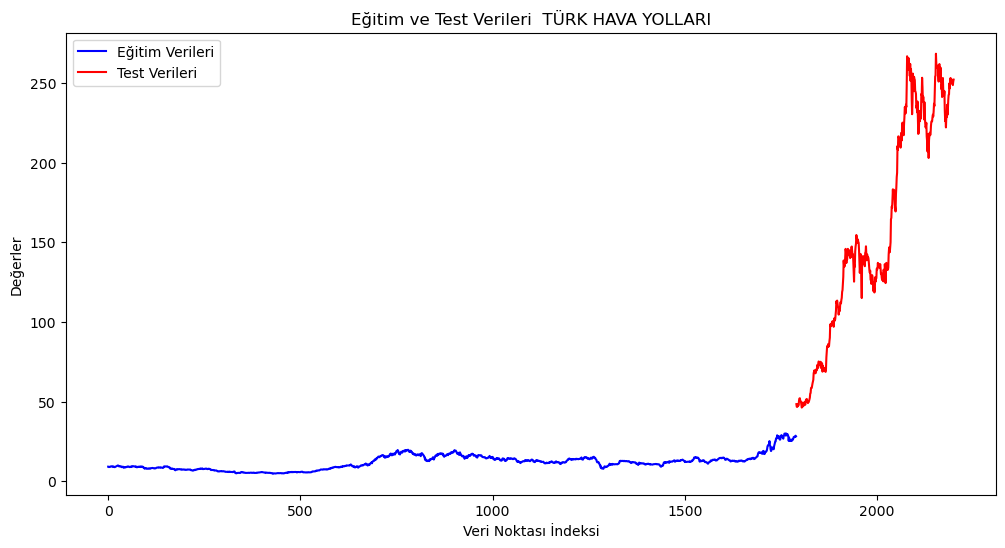

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Eğitim Verileri', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Verileri', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Eğitim ve Test Verileri  TÜRK HAVA YOLLARI')
plt.legend()
plt.show()

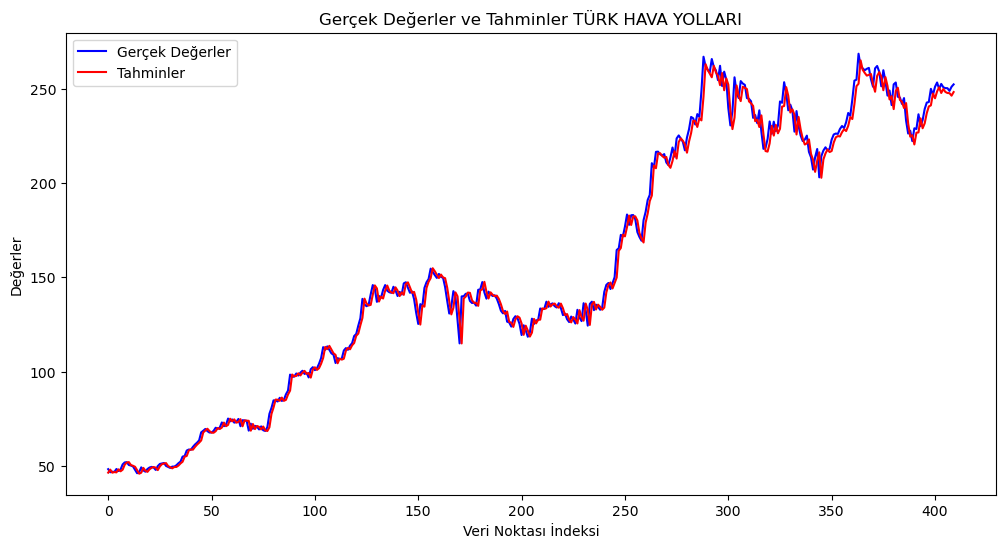

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(test_predict, label='Tahminler', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler ve Tahminler TÜRK HAVA YOLLARI')
plt.legend()
plt.show()

Ortalama Kare Hata (MSE): 26.43
Kök Ortalama Kare Hata (RMSE): 5.14
Ortalama Mutlak Hata (MAE): 3.61
R-Kare (R2): 0.99
Ortalama Mutlak Yüzde Hata (MAPE): 2.34%


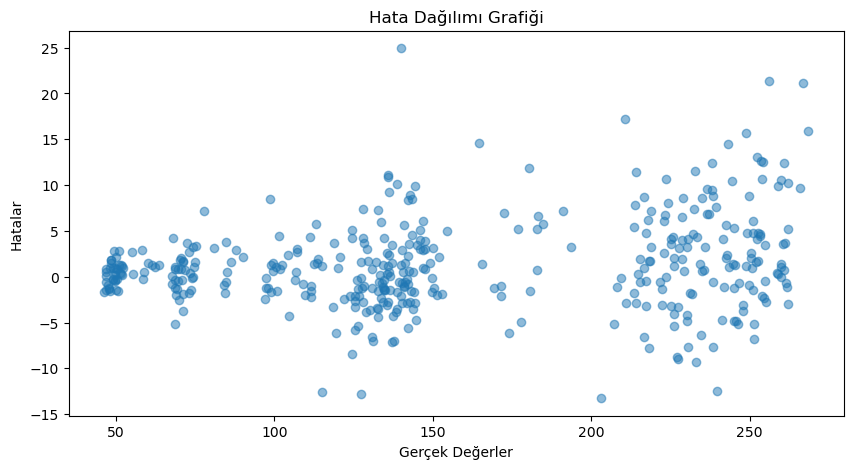

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, test_predict)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-Kare (R2): {r2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): {mape:.2f}%")

residuals = y_test - test_predict
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Hata Dağılımı Grafiği')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hatalar')
plt.show()

1/1 [==============================] - 0s 13ms/step


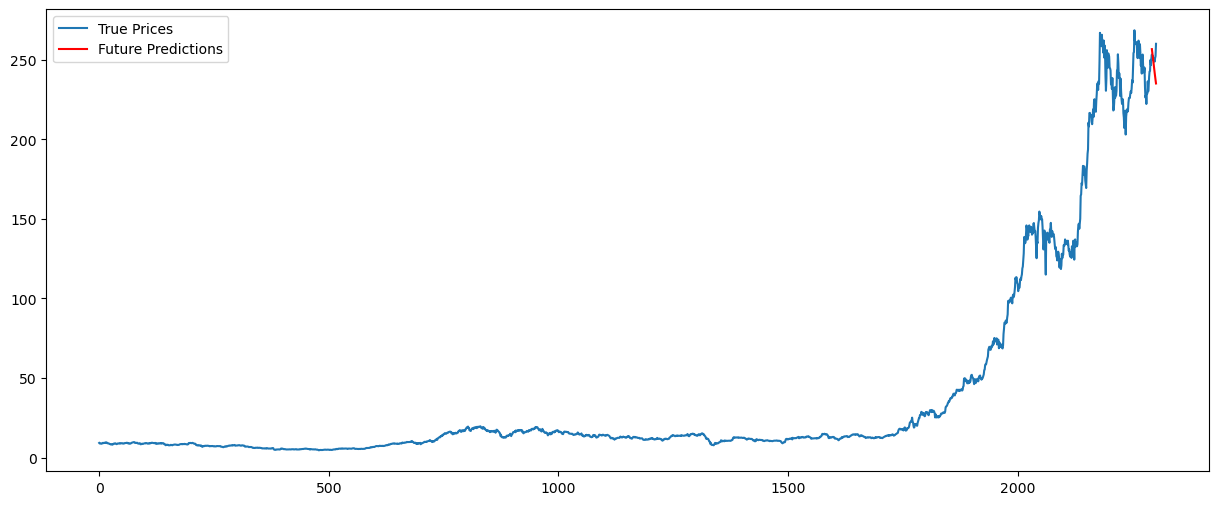

In [31]:
future_days = 10
last_sequence = prices_scaled[-time_steps:] 

future_predictions = []

for i in range(future_days):
    last_sequence = last_sequence.reshape(1, time_steps, 1)  
    next_prediction = model.predict(last_sequence)  
    future_predictions.append(next_prediction[0, 0])  
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1) 

future_predictions_array = np.array(future_predictions)

future_predictions_2d = future_predictions_array.reshape(-1, 1)

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')
plt.plot(range(len(prices_scaled) - future_days, len(prices_scaled)),
         scaler.inverse_transform(future_predictions_2d), label='Future Predictions', color='red')
plt.legend()
plt.show()

In [32]:
scaler.inverse_transform(future_predictions_2d)

array([[256.6614 ],
       [254.28784],
       [251.97493],
       [249.50409],
       [246.98051],
       [244.465  ],
       [241.99727],
       [239.60214],
       [237.29404],
       [235.0802 ]], dtype=float32)

PEGASUS

In [7]:
import yfinance as yf
import pandas_datareader as pdr

stock = "PGSUS.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today
data_source = 'yahoo'

bist30_data = pdr.DataReader(stock, data_source, start_date, end_date)

df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)
df.head()

TypeError: <class 'builtin_function_or_method'> is not convertible to datetime, at position 0

In [75]:
prices_scaled

array([[0.01750862],
       [0.01614431],
       [0.01652329],
       ...,
       [0.93367946],
       [0.93841664],
       [0.96778717]])

In [26]:
prices

array([[ 18.75      ],
       [ 28.70000076],
       [ 27.60000038],
       ...,
       [715.        ],
       [705.        ],
       [714.5       ]])

In [28]:
stock = "PGSUS.IS"
start_date = "2012-02-02"
end_date = "2023-12-02"
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

[*********************100%%**********************]  1 of 1 completed


In [29]:
X_train

array([[0.00809609, 0.01862631, 0.01746217, ..., 0.02211874, 0.02211874,
        0.02222457],
       [0.01862631, 0.01746217, 0.01746217, ..., 0.02211874, 0.02222457,
        0.02360038],
       [0.01746217, 0.01746217, 0.0172505 , ..., 0.02222457, 0.02360038,
        0.02412954],
       ...,
       [0.05974177, 0.06111758, 0.06180548, ..., 0.07021907, 0.06990158,
        0.07069531],
       [0.06111758, 0.06180548, 0.06413377, ..., 0.06990158, 0.07069531,
        0.07185946],
       [0.06180548, 0.06413377, 0.06270505, ..., 0.07069531, 0.07185946,
        0.07418774]])

In [30]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train

array([[[0.00809609],
        [0.01862631],
        [0.01746217],
        ...,
        [0.02211874],
        [0.02211874],
        [0.02222457]],

       [[0.01862631],
        [0.01746217],
        [0.01746217],
        ...,
        [0.02211874],
        [0.02222457],
        [0.02360038]],

       [[0.01746217],
        [0.01746217],
        [0.0172505 ],
        ...,
        [0.02222457],
        [0.02360038],
        [0.02412954]],

       ...,

       [[0.05974177],
        [0.06111758],
        [0.06180548],
        ...,
        [0.07021907],
        [0.06990158],
        [0.07069531]],

       [[0.06111758],
        [0.06180548],
        [0.06413377],
        ...,
        [0.06990158],
        [0.07069531],
        [0.07185946]],

       [[0.06180548],
        [0.06413377],
        [0.06270505],
        ...,
        [0.07069531],
        [0.07185946],
        [0.07418774]]])

In [11]:

stock = "TUPRS.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today()
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
112/112 - 5s - loss: 1.2333e-04 - 5s/epoch - 46ms/step
Epoch 2/100
112/112 - 2s - loss: 2.8169e-05 - 2s/epoch - 21ms/step
Epoch 3/100
112/112 - 2s - loss: 2.2522e-05 - 2s/epoch - 21ms/step
Epoch 4/100
112/112 - 2s - loss: 2.2652e-05 - 2s/epoch - 21ms/step
Epoch 5/100
112/112 - 3s - loss: 2.0608e-05 - 3s/epoch - 23ms/step
Epoch 6/100
112/112 - 3s - loss: 1.9000e-05 - 3s/epoch - 22ms/step
Epoch 7/100
112/112 - 2s - loss: 1.7792e-05 - 2s/epoch - 22ms/step
Epoch 8/100
112/112 - 2s - loss: 1.6798e-05 - 2s/epoch - 21ms/step
Epoch 9/100
112/112 - 2s - loss: 1.4629e-05 - 2s/epoch - 22ms/step
Epoch 10/100
112/112 - 2s - loss: 1.2851e-05 - 2s/epoch - 21ms/step
Epoch 11/100
112/112 - 2s - loss: 1.3273e-05 - 2s/epoch - 21ms/step
Epoch 12/100
112/112 - 2s - loss: 1.4586e-05 - 2s/epoch - 21ms/step
Epoch 13/100
112/112 - 2s - loss: 1.1772e-05 - 2s/epoch - 21ms/step
Epoch 14/100
112/112 - 2s - loss: 1.1149e-05 - 2s/epoch - 22ms/step
Epoch 15/100
112/112 - 2s - loss: 1.0316e-05 - 2s/epoch -

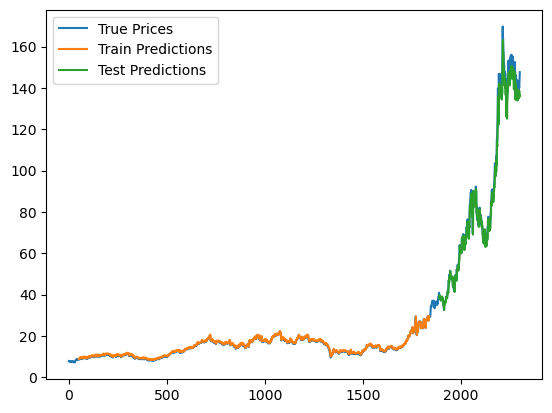

In [12]:


scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

train_predict_plot = np.empty_like(prices_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(prices_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(prices_scaled) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')

plt.plot(train_predict_plot, label='Train Predictions')

plt.plot(test_predict_plot, label='Test Predictions')

plt.legend()
plt.show()



In [13]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

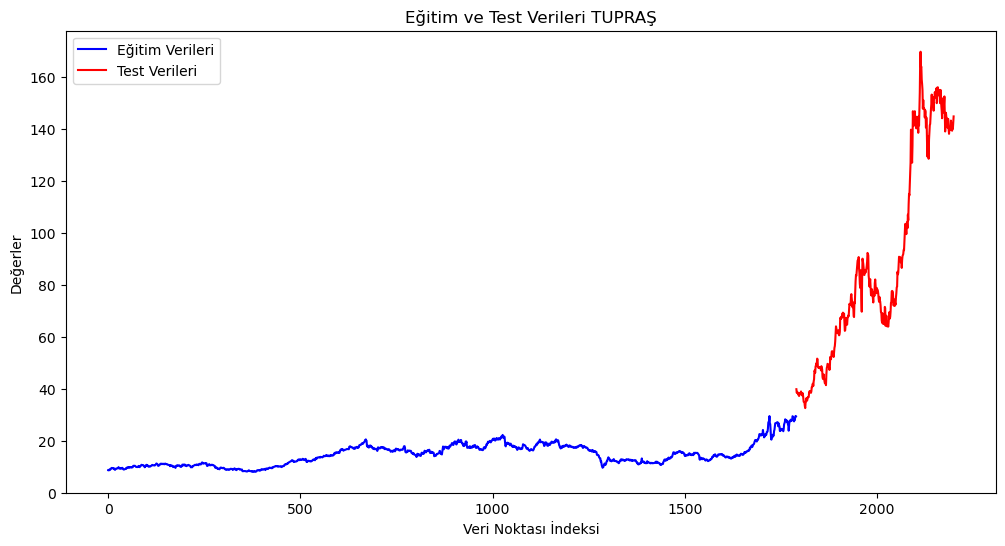

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Eğitim Verileri', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Verileri', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Eğitim ve Test Verileri TUPRAŞ')
plt.legend()
plt.show()

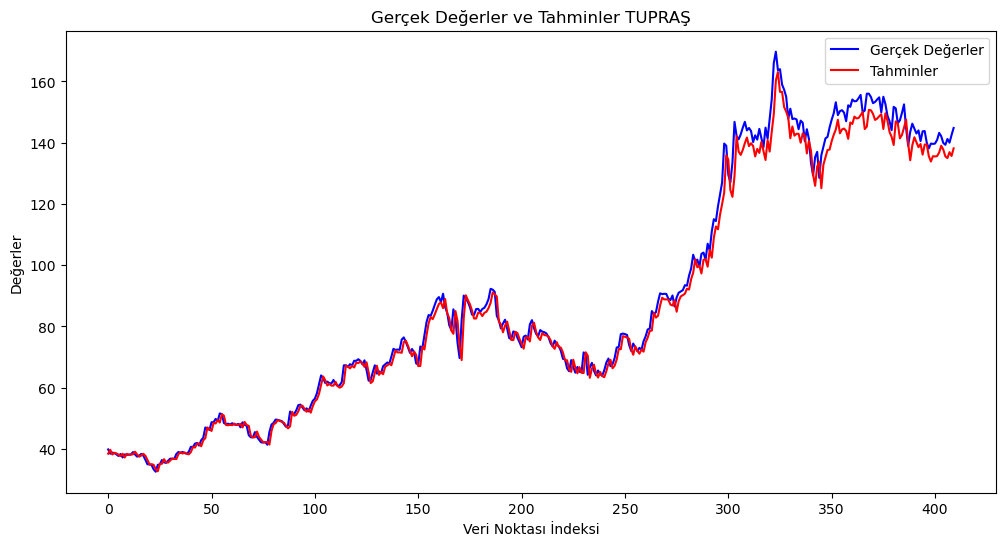

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(test_predict, label='Tahminler', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler ve Tahminler TUPRAŞ')
plt.legend()
plt.show()

Ortalama Kare Hata (MSE): 15.98
Kök Ortalama Kare Hata (RMSE): 4.00
Ortalama Mutlak Hata (MAE): 2.74
R-Kare (R2): 0.99
Ortalama Mutlak Yüzde Hata (MAPE): 2.82%


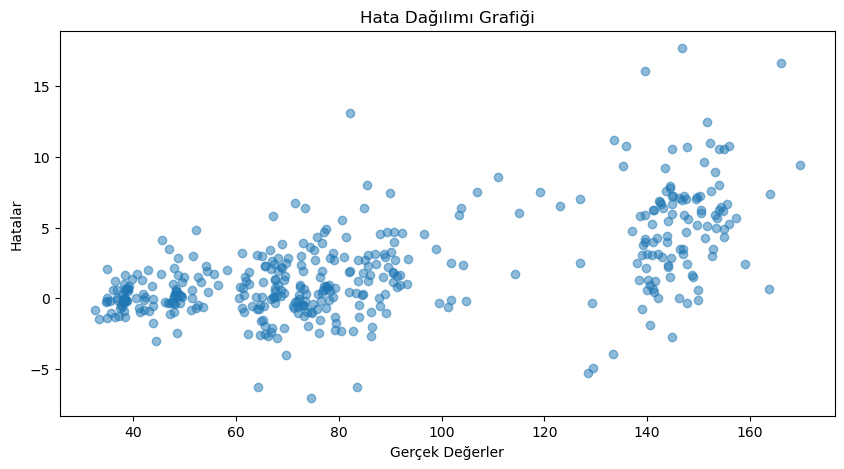

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, test_predict)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-Kare (R2): {r2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): {mape:.2f}%")

residuals = y_test - test_predict
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Hata Dağılımı Grafiği')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hatalar')
plt.show()

1/1 [==============================] - 0s 12ms/step


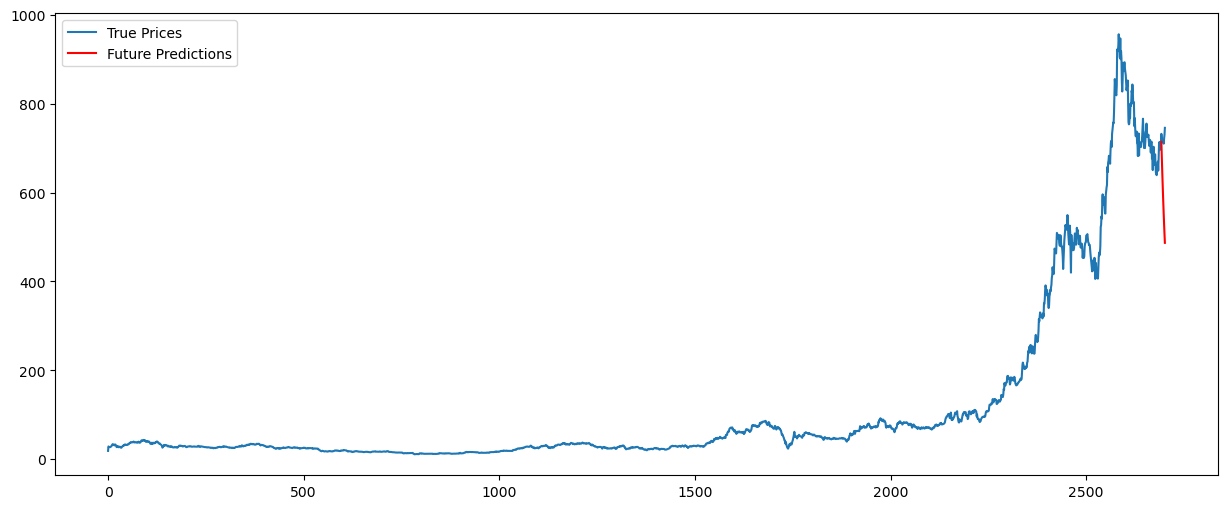

array([[713.9988 ],
       [683.1305 ],
       [654.5854 ],
       [627.06146],
       [600.658  ],
       [575.40625],
       [551.3465 ],
       [528.52924],
       [507.0036 ],
       [486.8051 ]], dtype=float32)

In [18]:
future_days = 10
last_sequence = prices_scaled[-time_steps:] 

future_predictions = []

for i in range(future_days):
    last_sequence = last_sequence.reshape(1, time_steps, 1)  
    next_prediction = model.predict(last_sequence)  
    future_predictions.append(next_prediction[0, 0]) 
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)  

future_predictions_array = np.array(future_predictions)

future_predictions_2d = future_predictions_array.reshape(-1, 1)

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')
plt.plot(range(len(prices_scaled) - future_days, len(prices_scaled)),
         scaler.inverse_transform(future_predictions_2d), label='Future Predictions', color='red')
plt.legend()
plt.show()
scaler.inverse_transform(future_predictions_2d)

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
112/112 - 4s - loss: 0.0015 - 4s/epoch - 33ms/step
Epoch 2/100
112/112 - 2s - loss: 3.1010e-04 - 2s/epoch - 17ms/step
Epoch 3/100
112/112 - 2s - loss: 2.6083e-04 - 2s/epoch - 16ms/step
Epoch 4/100
112/112 - 2s - loss: 2.2416e-04 - 2s/epoch - 16ms/step
Epoch 5/100
112/112 - 2s - loss: 2.1032e-04 - 2s/epoch - 16ms/step
Epoch 6/100
112/112 - 2s - loss: 2.6154e-04 - 2s/epoch - 16ms/step
Epoch 7/100
112/112 - 2s - loss: 1.8343e-04 - 2s/epoch - 16ms/step
Epoch 8/100
112/112 - 2s - loss: 1.8565e-04 - 2s/epoch - 16ms/step
Epoch 9/100
112/112 - 2s - loss: 1.4872e-04 - 2s/epoch - 17ms/step
Epoch 10/100
112/112 - 2s - loss: 1.6258e-04 - 2s/epoch - 19ms/step
Epoch 11/100
112/112 - 2s - loss: 1.7190e-04 - 2s/epoch - 17ms/step
Epoch 12/100
112/112 - 2s - loss: 1.1522e-04 - 2s/epoch - 17ms/step
Epoch 13/100
112/112 - 2s - loss: 1.2746e-04 - 2s/epoch - 19ms/step
Epoch 14/100
112/112 - 2s - loss: 1.2634e-04 - 2s/epoch - 17

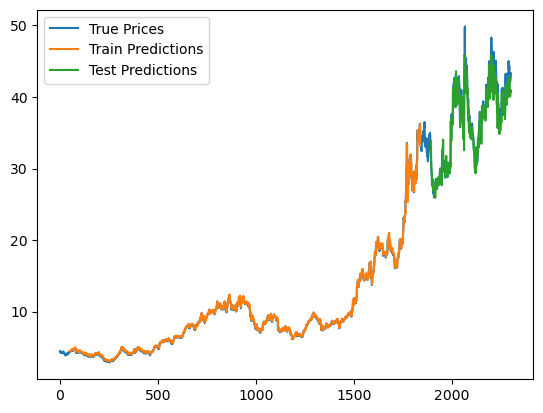

In [26]:
stock = "EREGL.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today()
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

train_predict_plot = np.empty_like(prices_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(prices_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(prices_scaled) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')

plt.plot(train_predict_plot, label='Train Predictions')

plt.plot(test_predict_plot, label='Test Predictions')

plt.legend()
plt.show()



In [27]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

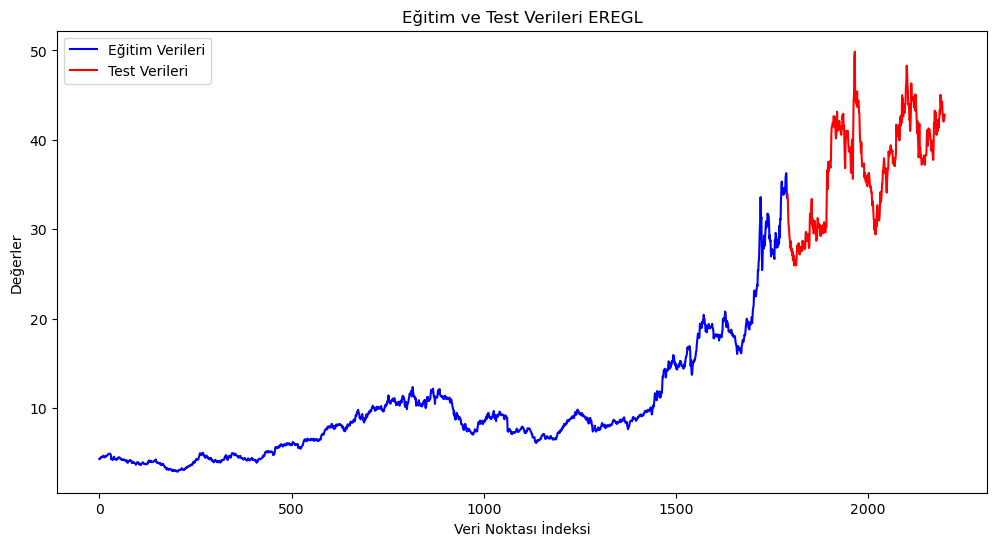

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Eğitim Verileri', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Verileri', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Eğitim ve Test Verileri EREGL')
plt.legend()
plt.show()

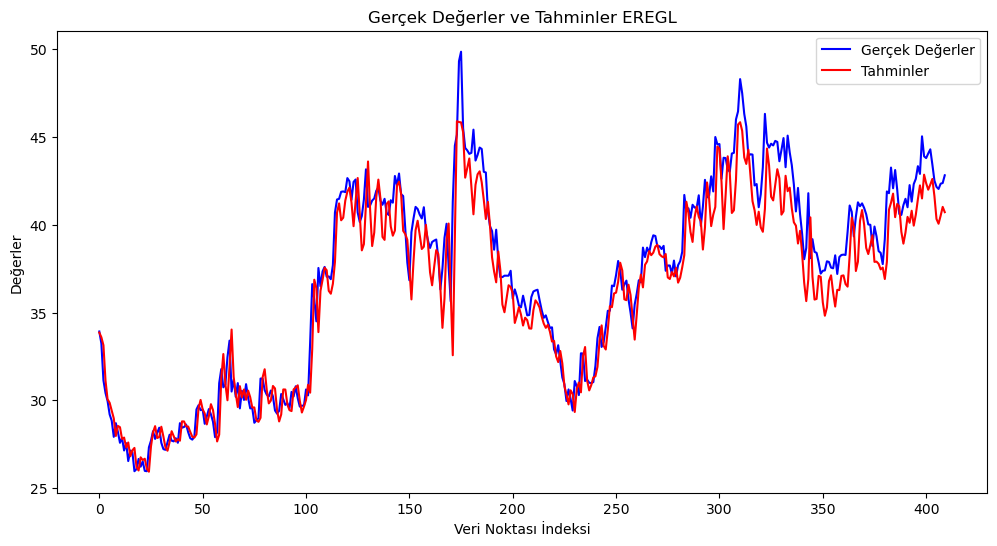

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(test_predict, label='Tahminler', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler ve Tahminler EREGL')
plt.legend()
plt.show()

Ortalama Kare Hata (MSE): 2.73
Kök Ortalama Kare Hata (RMSE): 1.65
Ortalama Mutlak Hata (MAE): 1.22
R-Kare (R2): 0.91
Ortalama Mutlak Yüzde Hata (MAPE): 3.16%


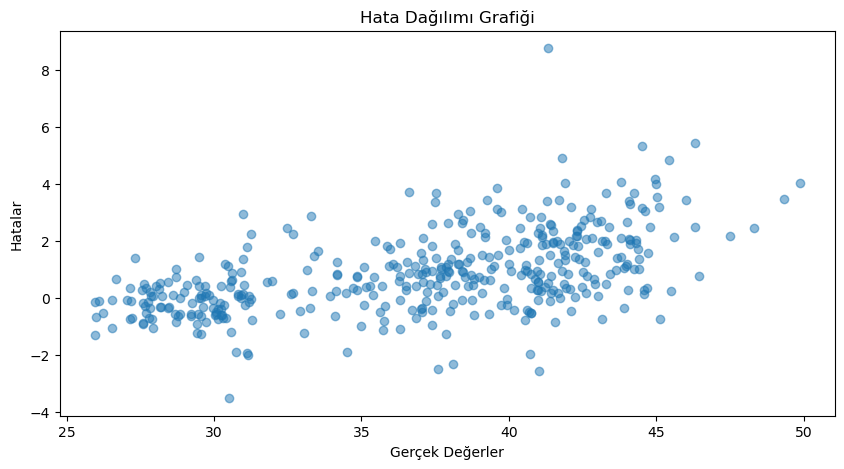

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, test_predict)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-Kare (R2): {r2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): {mape:.2f}%")

residuals = y_test - test_predict
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Hata Dağılımı Grafiği')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hatalar')
plt.show()

1/1 [==============================] - 0s 13ms/step


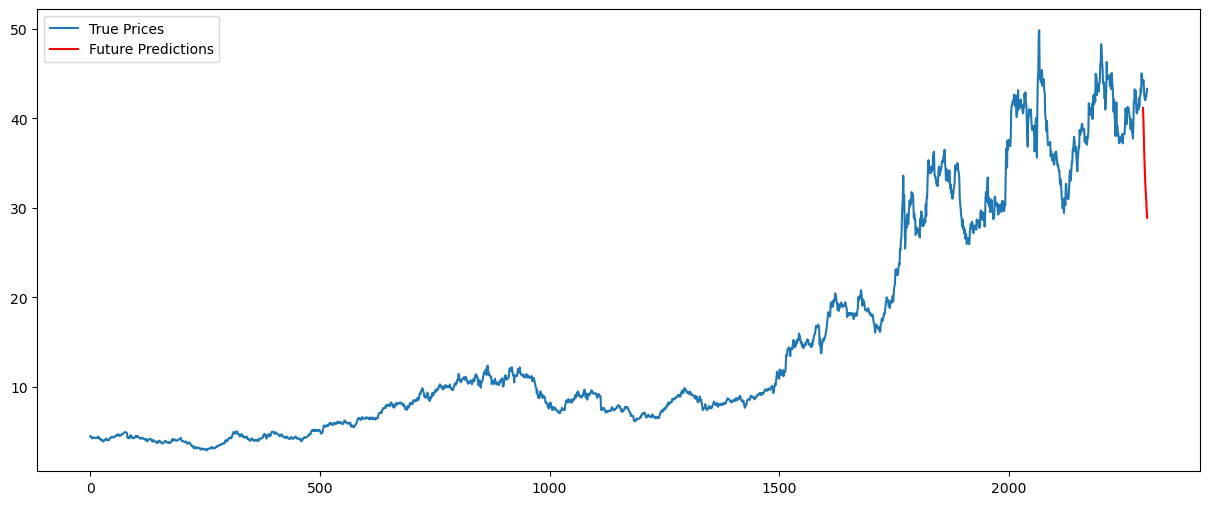

array([[41.165493],
       [39.59017 ],
       [37.650578],
       [35.687366],
       [34.01326 ],
       [32.737534],
       [31.716509],
       [30.741774],
       [29.762297],
       [28.888632]], dtype=float32)

In [31]:
future_days = 10
last_sequence = prices_scaled[-time_steps:]  

future_predictions = []

for i in range(future_days):
    last_sequence = last_sequence.reshape(1, time_steps, 1)  
    next_prediction = model.predict(last_sequence)  
    future_predictions.append(next_prediction[0, 0])  
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1) 

future_predictions_array = np.array(future_predictions)

future_predictions_2d = future_predictions_array.reshape(-1, 1)

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')
plt.plot(range(len(prices_scaled) - future_days, len(prices_scaled)),
         scaler.inverse_transform(future_predictions_2d), label='Future Predictions', color='red')
plt.legend()
plt.show()
scaler.inverse_transform(future_predictions_2d)

In [2]:

stock = "CIMSA.IS"
start_date = "2015-02-02"
end_date = datetime.datetime.today()
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close'].reset_index()
prices = bist30_data["Close"].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


2024-01-28 17:16:36.355360: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-28 17:16:36.355399: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-28 17:16:36.355410: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-28 17:16:36.355476: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-28 17:16:36.355510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-01-28 17:16:37.961903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


112/112 - 4s - loss: 5.8939e-05 - 4s/epoch - 32ms/step
Epoch 2/100
112/112 - 2s - loss: 1.0030e-05 - 2s/epoch - 16ms/step
Epoch 3/100
112/112 - 2s - loss: 7.8060e-06 - 2s/epoch - 16ms/step
Epoch 4/100
112/112 - 2s - loss: 8.5694e-06 - 2s/epoch - 17ms/step
Epoch 5/100
112/112 - 2s - loss: 8.2431e-06 - 2s/epoch - 16ms/step
Epoch 6/100
112/112 - 2s - loss: 6.4830e-06 - 2s/epoch - 17ms/step
Epoch 7/100
112/112 - 2s - loss: 5.6642e-06 - 2s/epoch - 16ms/step
Epoch 8/100
112/112 - 2s - loss: 5.6925e-06 - 2s/epoch - 16ms/step
Epoch 9/100
112/112 - 2s - loss: 5.6278e-06 - 2s/epoch - 16ms/step
Epoch 10/100
112/112 - 2s - loss: 4.2330e-06 - 2s/epoch - 16ms/step
Epoch 11/100
112/112 - 2s - loss: 4.6468e-06 - 2s/epoch - 16ms/step
Epoch 12/100
112/112 - 2s - loss: 4.7961e-06 - 2s/epoch - 16ms/step
Epoch 13/100
112/112 - 2s - loss: 5.5469e-06 - 2s/epoch - 16ms/step
Epoch 14/100
112/112 - 2s - loss: 3.7160e-06 - 2s/epoch - 16ms/step
Epoch 15/100
112/112 - 2s - loss: 3.6643e-06 - 2s/epoch - 16ms/step
E

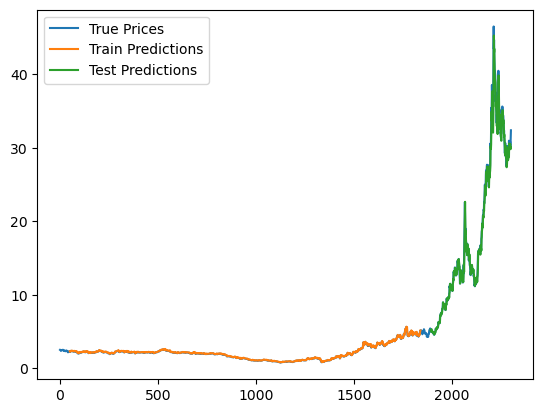

In [3]:



scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

train_size = int(len(prices_scaled) * 0.80)
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

train_predict_plot = np.empty_like(prices_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(prices_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(prices_scaled) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(prices_scaled), label='True Prices')

plt.plot(train_predict_plot, label='Train Predictions')

plt.plot(test_predict_plot, label='Test Predictions')

plt.legend()
plt.show()

In [4]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

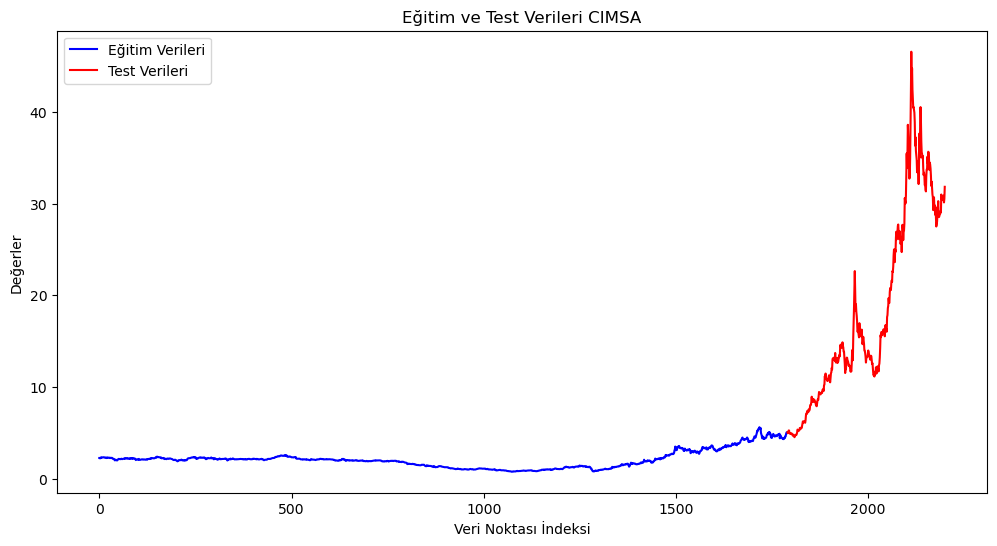

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Eğitim Verileri', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Verileri', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Eğitim ve Test Verileri CIMSA')
plt.legend()
plt.show()

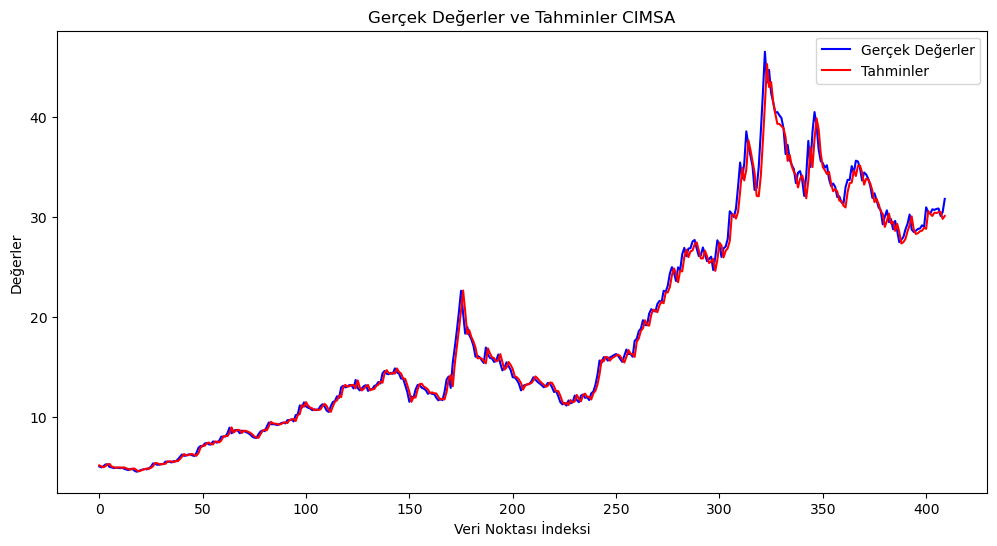

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler', color='blue')
plt.plot(test_predict, label='Tahminler', color='red')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler ve Tahminler CIMSA')
plt.legend()
plt.show()

Ortalama Kare Hata (MSE): 0.82
Kök Ortalama Kare Hata (RMSE): 0.90
Ortalama Mutlak Hata (MAE): 0.56
R-Kare (R2): 0.99
Ortalama Mutlak Yüzde Hata (MAPE): 2.79%


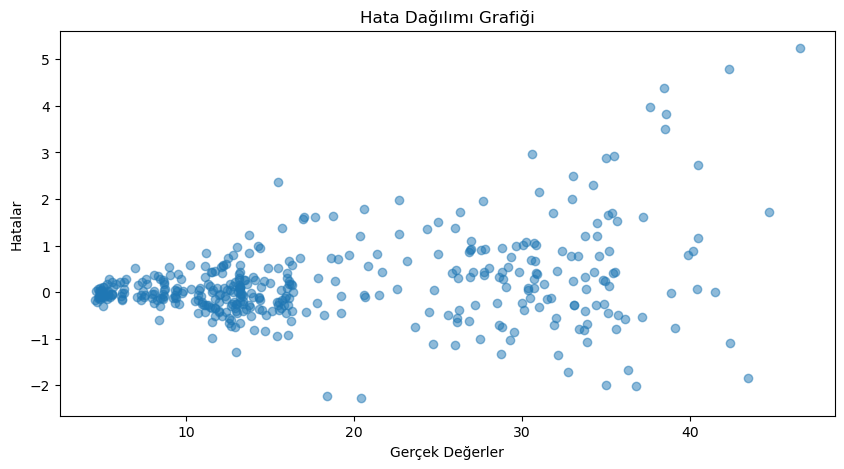

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, test_predict)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-Kare (R2): {r2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): {mape:.2f}%")

residuals = y_test - test_predict
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Hata Dağılımı Grafiği')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hatalar')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2302 non-null   datetime64[ns]
 1   Close   2302 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.1 KB
